In [146]:
import pandas as pd
import os
%xmode minimal


Exception reporting mode: Minimal


In [147]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv'
file = '../data/titanic_2_original.pickle' # Damit es local gespeichert wird

if os.path.exists(file):
    t = pd.read_pickle(file)
else:
    t = pd.read_csv(url)
    t.to_pickle(file)
t.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S


# Aufgabe 6
## Aufgabe 6.1

In [148]:
import seaborn as sns

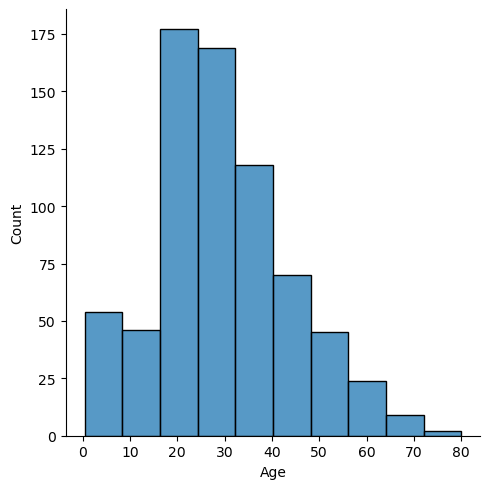

In [149]:
sns.displot(data=t, x='Age', bins=10)

In [150]:
bins_alter = list(range(0,100,10))

In [151]:
t['Age Bins'] = pd.cut(t['Age'], bins=bins_alter) 

In [152]:
t.groupby('Age Bins')['PassengerId'].count()

Age Bins
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
(80, 90]      0
Name: PassengerId, dtype: int64

## Aufgabe 6.2

In [153]:
ausreißer_fare = t.loc[t['Fare'] == 300]

In [154]:
ausreißer_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Bins


In [155]:
t['Fare'] = t['Fare'].apply(lambda r: 300 if r > 300 else r)

c)

In [156]:
t['PassengerId'].loc[t['Fare'] > 112.07915].count()

45

In [157]:
fare_95 = t['Fare'].quantile(0.95)
fare_95

112.07915

In [158]:
t['Fare'] = t['Fare'] < fare_95

In [160]:
t['PassengerId'].loc[t['Fare'] > fare_95].count()

0